In [1]:
%matplotlib inline

from consts import * 

import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import Image
import os
import re

In [2]:
from scipy.special import jn, jn_zeros,j0,j1

In [3]:
print j0(1),jn(0,1)

0.765197686558 0.765197686558


In [4]:
workdir='./undulator'
os.chdir(workdir)

## Undulator辐射

In [14]:
Nu,KK=40,0.934*0.4*3.2

Ek=7.2 # MeV
gamma=1+Ek/g_mec2

lamb=300e-6 # um
E_photon=g_h*g_c/lamb

print E_photon

6.6214856109e-22


In [11]:
Nu,KK=25,3.7

Ek=17 # MeV
gamma=1+Ek/g_mec2

lamb=300e-6 # um
E_photon=g_h*g_c/lamb

print E_photon

6.6214856109e-22


In [26]:
def JJ2(n=0):
    m=2*n+1
    x=1.0*m*KK**2/(4+2*KK**2)
    return (jn(n,x)-jn(n+1,x))**2
def ss(x):
    if(x==0):
        return Nu**2
    else:
        return np.sin(Nu*x)**2/np.sin(x)**2
def undulator_radiation(ww,w1,n=0):
    m=2*n+1
    wm=w1*m
    #x=1.0*m*KK**2/(4+2*KK**2)
    y=np.pi*(ww-wm)/w1
    
    c1=g_qe**2*gamma**2*m**2*KK**2/4.0/np.pi/g_eps0/g_c/(1+KK**2/2)**2
    #print JJ2(x),ss(y),c1
    return c1*ss(y)*JJ2(n)
def angular_width(n=0):
    m=2*n+1
    return 2*np.pi/gamma**2/2./m/Nu*(1+KK**2/2)
def frac_bandwidth(n=0):
    m=2*n+1
    wm=w1*m
    return 1.0/m/Nu*wm

def radiation(ww,w1,n=0):
    return undulator_radiation(ww,w1,n)*angular_width(n)*frac_bandwidth(n)

def form_factor(lamb=300e-6,sigma_z=100e-15):
    sigma_z=sigma_z*g_c
    #lamb=lamb
    return np.exp(-2*np.pi**2*sigma_z**2/lamb**2)

def radiation_from_bunch(ww,w1,lamb,sigma_z,Qe=20e-12,n=0):
    Ne=Qe/g_qe
    return radiation(ww,w1,n)*(Ne+Ne*(Ne-1)*form_factor(lamb,sigma_z)**2)

### 计算不同束长的电子束产生的辐射能量

In [51]:
Qe=25e-12
sigma_z=300e-15 # fs
lamb=np.linspace(100e-6,500e-6,200)

rr=[]
for i in np.arange(len(lamb)):
    ll=lamb[i]
    w1=2*np.pi*g_c/ll
    ww=w1
    ff=form_factor(ll,sigma_z)**2
    nj=radiation_from_bunch(ww,w1,ll,sigma_z,Qe)*1e9
    rr.append([ll,nj,ff])
rr=np.array(rr)
np.savetxt('sigma_300fs.dat',rr,fmt='%12.4E')

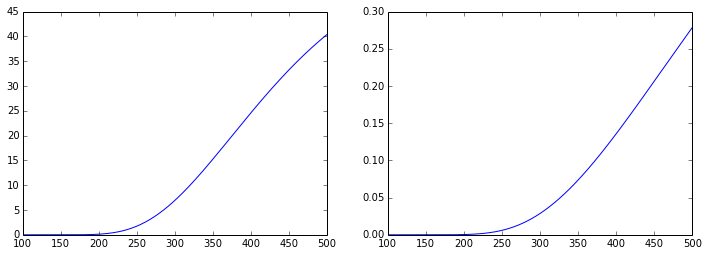

In [52]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
axes[0].plot(rr[:,0]*1e6,rr[:,1])
axes[1].plot(rr[:,0]*1e6,rr[:,2])

In [24]:
w1=2*np.pi*g_c/lamb
ww=w1
#print w1

Qe=20e-12 # C
Ne=Qe/g_qe

print undulator_radiation(ww,w1)/E_photon*w1*1e-3*1e-6
print radiation(ww,w1)

1.01357211535e-06
9.92270583183e-24


In [22]:
x=KK**2/(4.+2.*KK**2)
rad=g_qe**2*w1*JJ2()*x/g_eps0/g_c
print rad

9.92270583183e-24


In [237]:
w1=2*np.pi*g_c/300e-6
n=3
wm=w1*(2*n+1)
lamb=np.linspace(42,44,501)
#print lamb
rr=[]
for i in np.arange(501):
    ll=lamb[i]*1e-6
    ww=2*np.pi*g_c/ll
    E_photon=g_h*wm/2/np.pi
    r1=undulator_radiation(ww,w1,n)/E_photon*wm*1e-3*1e-6
    r2=ss(np.pi*(ww-wm)/w1)
    r3=JJ2(n)
    rr.append([ll*1e6,r1,r2,r3])
rr=np.array(rr)

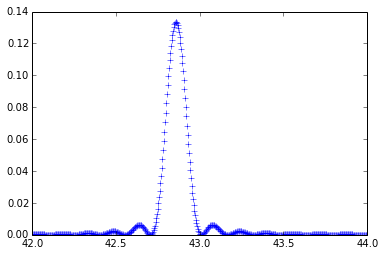

In [238]:
np.savetxt('m7.dat',rr,fmt='%.4E')
plt.plot(rr[:,0],rr[:,1]*1e6,'+')
plt.show()

In [239]:
for n in np.arange(4):
    m=(2*n+1)
    KK=3.7
    print m,JJ2(n)*m**2

1 0.547595882349
3 1.03298693087
5 1.3486594066
7 1.57397255158


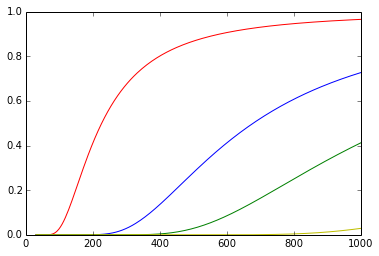

In [283]:
xx=np.linspace(30,1000,200)
y1=form_factor(xx,100e-15)**2
y2=form_factor(xx,300e-15)**2
y3=form_factor(xx,500e-15)**2
y4=form_factor(xx,1000e-15)**2
plt.plot(xx,y1,'r-',xx,y2,'b-',xx,y3,'g-',xx,y4,'y-')
plt.show()

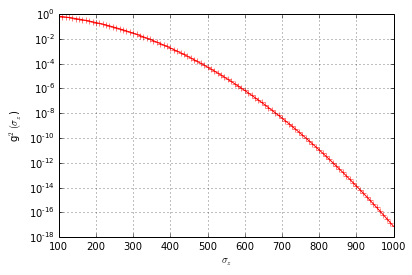

In [288]:
xx=np.array([100e-15,300e-15,500e-15,1000e-15,2000e-15])
xx=np.linspace(100e-15,1000e-15,100)
yy=form_factor(300,xx)**2
fig,ax=plt.subplots()
ax.plot(xx*1e15,yy,'r-+')
ax.set_yscale("log")
ax.grid()
ax.set_xlabel('$\sigma_z$')
ax.set_ylabel('g$^2(\sigma_z$)')
#ax.show()

In [287]:
print str.format('%.4E' % (25e-12/g_qe))

1.5604E+08


In [286]:
rr=np.array([xx,yy]).T
np.savetxt('g2_sz_300um.dat',rr,fmt='%.4E')